<div style="display: flex; background-color: #7a310c;" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DES VENTES DE LA LIBRAIRIE LAPAGE</h1>
</div>

<center>
<img src="C:\\Users\yannf\OneDrive\SWSetup\Bureau\Cours\Formation_data_analyse\projets\projet_9\ressources\librairy_image_hq.jpg" width="400"/>
</center>

In [1]:
# color hexa : #7a310c / #a75d38

<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">1. Ouverture et chargement des fichiers</h1>
</div>

In [2]:
#importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import calendar
import statsmodels
import math
import scipy
import statsmodels.api as sm
import random
import time

In [3]:
#Ouverture des fichiers en prenant soin de parser la date dans le fichier contenant les dates de transactions
path = "C:\\Users\\yannf\\Desktop\\Cours\\Formation_data_analyse\\projets\\projet_9\\ressources"
path_2 = "C:\\Users\\yannf\\OneDrive\\SWSetup\\Bureau\\Cours\\Formation_data_analyse\\projets\\projet_9\\ressources"
df_customers = pd.read_csv(f"{path_2}\\customers.csv", sep=",")
df_products = pd.read_csv(f"{path_2}\\products.csv", sep=",")
df_transactions = pd.read_csv(f"{path_2}\\Transactions.csv", sep=",", parse_dates=True)

<div style="display: flex; background-color: #7a310c;" >
<h1 style="margin: auto; padding: 20px; ">2. Contenu et dimensions des fichiers</h1>
</div>

<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">2.1 - Fichiers clients</h1>
</div>

In [4]:
# Dimensions du fichiers
print(f"Le fichier à {df_customers.shape[0]} lignes et {df_customers.shape[1]} colonnes")
print("Voici le type des colonnes :\n",df_customers.dtypes)
print(df_customers.head())

Le fichier à 8623 lignes et 3 colonnes
Voici le type des colonnes :
 client_id    object
sex          object
birth         int64
dtype: object
  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943


<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">2.2 - Fichiers produits</h1>
</div>

In [5]:
# Dimensions du fichiers
print(f"Le fichier à {df_products.shape[0]} lignes et {df_products.shape[1]} colonnes")
print("Voici le type des colonnes :\n",df_products.dtypes)
print(df_products.head())

Le fichier à 3287 lignes et 3 colonnes
Voici le type des colonnes :
 id_prod     object
price      float64
categ        int64
dtype: object
  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0


<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">2.3 - Fichiers transactions</h1>
</div>

In [6]:
# Dimensions du fichiers
print(f"Le fichier à {df_transactions.shape[0]} lignes et {df_transactions.shape[1]} colonnes")
print("Voici le type des colonnes :\n",df_transactions.dtypes)
print(df_transactions.head())

Le fichier à 679532 lignes et 4 colonnes
Voici le type des colonnes :
 id_prod       object
date          object
session_id    object
client_id     object
dtype: object
  id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232


<div style="display: flex; background-color: #7a310c;" >
<h1 style="margin: auto; padding: 20px; ">3. Nettoyage et préparation des données</h1>
</div>

<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">3.1 - Fichiers clients</h1>
</div>

In [7]:
#vérification de la structure des colonnes
print(f"Nous avons {len(df_customers)-len(df_customers[df_customers['client_id'].str.startswith('c_')])} identifiant client qui sont au mauvais format.")
print(f"Il y a {len(df_customers['client_id'].unique())} identifiants uniques, soit autant que d'enregistrements de client")
print(f"Les sexes différents des clients sont {' et '.join(df_customers['sex'].unique())}.")

Nous avons 2 identifiant client qui sont au mauvais format.
Il y a 8623 identifiants uniques, soit autant que d'enregistrements de client
Les sexes différents des clients sont f et m.


In [8]:
#suppression des identifiants au mauvais format car relier à des tests qui n'ont pas d'impact sur les analyses
df_customers = df_customers.loc[~df_customers["client_id"].isin(["ct_0", "ct_1"])]

In [9]:
# vérifie qu'il n'y a pas de valeur d'ages atypiques  (plus de 100 ans ou moins de 18 ans)
print(f"Il y a {len(df_customers.loc[(df_customers['birth'] <1925) |(df_customers['birth'] > 2007)])} clients qui ont un age atypiques")
# modifie les année de naissance en age
df_customers["birth"]= datetime.datetime.today().year - df_customers["birth"]
df_customers.rename(columns={"birth": "age"}, inplace=True)
df_customers.head(3)

Il y a 0 clients qui ont un age atypiques


,client_id,sex,age
0,c_4410,f,58
1,c_7839,f,50
2,c_1699,f,41


<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">3.2 - Fichiers produits</h1>
</div>

In [10]:
#vérification que les id_produits sont aux bons format et qu'ils sont tous uniques
df_products_test = df_products.copy()
df_products_test["start_id_prod"] = df_products_test["id_prod"].str[0:2]
print(f"Les différents début d'identifiant produit existant sont : {df_products_test['start_id_prod'].unique()}")
print(f"Il y a {len(df_products['id_prod'].unique())} identifiants uniques, soit autant que de produits différents.")

Les différents début d'identifiant produit existant sont : ['0_' '1_' '2_' 'T_']
Il y a 3287 identifiants uniques, soit autant que de produits différents.


In [11]:
#vérification de la colonne catégorie
print(df_products["categ"].unique())

[0 1 2]


In [12]:
#vérification de la cohérence des prix 
print(f"Il y a {len(df_products.loc[df_products['price'] < 0])} prix inférieur à 0.")
std_price = df_products["price"].std()
avg_price = df_products["price"].mean()
print(f"La moyenne de prix est {round(avg_price,2)} et l'ecart-type {round(std_price,2)}")
print(f"Il y a {len(df_products.loc[(df_products['price'] > avg_price + 3*std_price) | (df_products['price'] < avg_price - 3*std_price)])} produits qui ont un Z-score élevé")
# Après vérification, le Z-score maximum pour un produit est d'environ 8.

Il y a 1 prix inférieur à 0.
La moyenne de prix est 21.86 et l'ecart-type 29.85
Il y a 97 produits qui ont un Z-score élevé


In [13]:
#correction de prix et d'identifiants 
print(df_products.loc[df_products['price'] < 0])
print(df_products.loc[df_products["id_prod"].str.startswith('T_')])
#Vérification de l'éventuel vente du produit concerné avant de le supprimer
print(df_transactions.loc[df_transactions["id_prod"].str.startswith('T_')])
#produits utilisé pour réalisé des tests, non pertinents pour l'analyse, nous pouvons le supprimer
df_products = df_products.loc[df_products["id_prod"] != "T_0"]

    id_prod  price  categ
731     T_0   -1.0      0
    id_prod  price  categ
731     T_0   -1.0      0
       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]


<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">3.3 - Fichiers transactions</h1>
</div>

In [14]:
#suppression des transactions liées aux identifiants "ct_0" et "ct_1" pour pouvoir vérifier le parsage des dates
df_transactions = df_transactions.loc[~df_transactions["client_id"].isin(["ct_0", "ct_1"])]

In [15]:
#verifie que les dates sont correctement parser
df_transactions["date"] = df_transactions["date"].astype("datetime64[D]")

In [16]:
#supprime les lignes sans valeurs
df_transactions = df_transactions.dropna(how="all", axis=0)

In [17]:
#vérification de la colonne client_id
list_clients = df_customers["client_id"].unique().tolist()
print(f"Il y a {len(df_transactions.loc[df_transactions['client_id'].isin(list_clients) == False])} transactions qui ont un client_id erroné")

Il y a 0 transactions qui ont un client_id erroné


In [18]:
#vérification de la colonne id_prod
list_produits = df_products["id_prod"].unique().tolist()
print(f"Il y a {len(df_transactions.loc[df_transactions['id_prod'].isin(list_produits) == False])} transactions qui ont un identifiant produit erroné")

Il y a 221 transactions qui ont un identifiant produit erroné


In [19]:
# Un seul id_prod concerné par les transactions n'étant relié à aucun id_prod
df_transactions.loc[df_transactions['id_prod'].isin(list_produits) == False,"id_prod"].unique()

array(['0_2245'], dtype=object)

<div style="display: flex; background-color: #7a310c;" >
<h1 style="margin: auto; padding: 20px; ">4. Jointures et analyse préliminaires</h1>
</div>

<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">4.1 - Jointures des fichiers</h1>
</div>

In [20]:
#jointure à gauche du fichier de transactions avec les produits 
df = pd.merge(df_transactions, df_products, on = "id_prod", how="left", indicator=True)
df.rename(columns={"_merge" :"_merge_1"}, inplace=True)
#jointure à gauche du fichier merger et des clients
df = pd.merge(df, df_customers, on = "client_id", how="left", indicator=True)

In [21]:
df = df.set_index("date")

In [22]:
#vérification de la jointure
print(len(df.loc[df["_merge"] != "both"]))
print(len(df.loc[df["_merge_1"] != "both"]))
# les 221 transactions qui posent problèmes viennent toutes du produits "0_2245"
#suppression des transactions concernées
df = df.loc[df["id_prod"] != "0_2245"]

0
221


In [23]:
# reaggrége la colonnes de prix pour avoir un total de chiffre d'affaires par période
df_day = pd.DataFrame({"categ_0_ca" : df.loc[df["categ"] ==0]["price"].resample('D').sum(),
                             "categ_1_ca" : df.loc[df["categ"] ==1]["price"].resample('D').sum(),
                             "categ_2_ca" : df.loc[df["categ"] ==2]["price"].resample('D').sum(),
                             "categ_0_tr" : df.loc[df["categ"] ==0]["price"].resample('D').count(),
                             "categ_1_tr" : df.loc[df["categ"] ==1]["price"].resample('D').count(),
                             "categ_2_tr" : df.loc[df["categ"] ==2]["price"].resample('D').count(),
                             "global_ca" : df["price"].resample('D').sum(),
                             "global_tr" : df["price"].resample('D').count()})
df_week = pd.DataFrame({"categ_0_ca" : df.loc[df["categ"] ==0]["price"].resample('W').sum(),
                             "categ_1_ca" : df.loc[df["categ"] ==1]["price"].resample('W').sum(),
                             "categ_2_ca" : df.loc[df["categ"] ==2]["price"].resample('W').sum(),
                             "categ_0_tr" : df.loc[df["categ"] ==0]["price"].resample('W').count(),
                             "categ_1_tr" : df.loc[df["categ"] ==1]["price"].resample('W').count(),
                             "categ_2_tr" : df.loc[df["categ"] ==2]["price"].resample('W').count(),
                             "global_ca" : df["price"].resample('W').sum(),
                             "global_tr" : df["price"].resample('W').count()})
df_month = pd.DataFrame({"categ_0_ca" : df.loc[df["categ"] ==0]["price"].resample('M').sum(),
                             "categ_1_ca" : df.loc[df["categ"] ==1]["price"].resample('M').sum(),
                             "categ_2_ca" : df.loc[df["categ"] ==2]["price"].resample('M').sum(),
                             "categ_0_tr" : df.loc[df["categ"] ==0]["price"].resample('M').count(),
                             "categ_1_tr" : df.loc[df["categ"] ==1]["price"].resample('M').count(),
                             "categ_2_tr" : df.loc[df["categ"] ==2]["price"].resample('M').count(),
                             "global_ca" : df["price"].resample('M').sum(),
                             "global_tr" : df["price"].resample('M').count()})

In [24]:
#analyse des catégories de produits
#catégorie 0
print("Moyenne catéorie 0 : ",df.loc[df["categ"] == 0, "price"].mean())
print("Minimum et maximum catégorie 0 : min = ", df.loc[df["categ"] == 0, "price"].min(), "max = ",df.loc[df["categ"] == 0, "price"].max())
# catégorie 1
print("Moyenne catéorie 1 : ",df.loc[df["categ"] == 1, "price"].mean())
print("Minimum et maximum catégorie 1 : min = ", df.loc[df["categ"] == 1, "price"].min(), "max = ",df.loc[df["categ"] == 1, "price"].max())
# catégorie 2
print("Moyenne catéorie 2 : ",df.loc[df["categ"] == 2, "price"].mean())
print("Minimum et maximum catégorie 2 : min = ", df.loc[df["categ"] == 2, "price"].min(), "max = ",df.loc[df["categ"] == 2, "price"].max())
# les catégories de produits de représentent des gammes du plus cher au moins cher

Moyenne catéorie 0 :  10.638188052250644
Minimum et maximum catégorie 0 : min =  0.62 max =  40.99
Moyenne catéorie 1 :  20.485729522954276
Minimum et maximum catégorie 1 : min =  2.0 max =  80.99
Moyenne catéorie 2 :  76.20741221938987
Minimum et maximum catégorie 2 : min =  30.99 max =  300.0


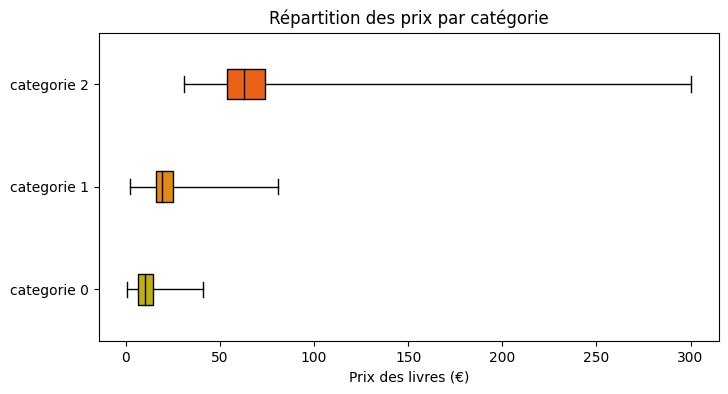

In [25]:
#Affichage de la répartition des prix par catégorie de produit
categ_0 = df.loc[df["categ"] ==0, "price"].values
categ_1 = df.loc[df["categ"] ==1, "price"].values
categ_2 = df.loc[df["categ"] ==2, "price"]
colors = ['#bdb010', '#e18b15', '#ea6118']
fig, ax = plt.subplots(figsize=(8,4))
medianprops = dict(color="black",linewidth=1)
bp = ax.boxplot([categ_0, categ_1, categ_2], vert=False, patch_artist=True, labels= ["categorie 0", "categorie 1", "categorie 2"],whis=12, medianprops=medianprops)
ax.set_title("Répartition des prix par catégorie")
ax.set_xlabel('Prix des livres (€)')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

In [26]:
# nombre de ventes
tr_total = df_day["global_tr"].sum()
tr_month = round(df_month["global_tr"].mean())
tr_week = round(df_week["global_tr"].mean())
tr_day = round(df_day["global_tr"].mean())
print(f"Les ventes total de la boutique en ligne s'élève à {tr_total}.")
print(f"Cela correspond à {tr_month} ventes par mois en moyenne.")
print(f"Cela équivaut à environ {tr_week} par semaine ou {tr_day} par jour.")

Les ventes total de la boutique en ligne s'élève à 679111.
Cela correspond à 28296 ventes par mois en moyenne.
Cela équivaut à environ 6468 par semaine ou 930 par jour.


In [27]:
# chiffres d'affaires
ca_total = round(df_day["global_ca"].sum())
ca_month = round(df_month["global_ca"].mean())
ca_week = round(df_week["global_ca"].mean())
ca_day = round(df_day["global_ca"].mean())
print(f"Le chiffre d'affaires total de la boutique en ligne s'élève à {ca_total}€.")
print(f"Cela correspond à {ca_month}€ par mois en moyenne.")
print(f"Cela correspond à environ {ca_week}€ par semaine ou {ca_day}€ par jour.")

Le chiffre d'affaires total de la boutique en ligne s'élève à 11853729€.
Cela correspond à 493905€ par mois en moyenne.
Cela correspond à environ 112893€ par semaine ou 16238€ par jour.


<div style="display: flex; background-color: #7a310c;" >
<h1 style="margin: auto; padding: 20px; ">5. Analyse appronfondies des indicateurs de ventes</h1>
</div>

<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">5.1 - Chiffres d'affaires</h1>
</div>

In [28]:
#creation d'une colonne avec la moyenne mobile du CA calculée sur 30 jours
period = 30
df_day["rolling_avg_ca"] = df_day["global_ca"].rolling(window=period).mean().to_frame()

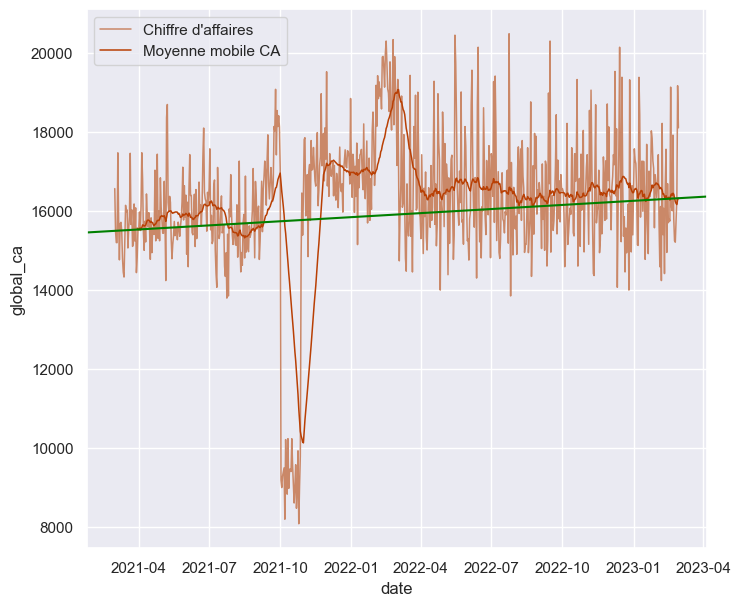

In [29]:
#graphiques représentant l'évolution du chiffre d'affaires par semaine et par mois avec ajout de la moyenne mobile (30)
date_1 = (datetime.datetime(2021,3,1) - datetime.datetime(1970,1,1)).days +31
date_2 = (datetime.datetime(2023,2,28) - datetime.datetime(1970,1,1)).days
sns.set_theme(rc={'figure.figsize':(8,7)})
sns.lineplot(data=df_day, x=df_day.index ,y="global_ca", color="#ca8868", label="Chiffre d'affaires", linewidth=1.1)
sns.lineplot(data=df_day, x=df_day.index ,y="rolling_avg_ca", color="#b94005", label="Moyenne mobile CA", linewidth=1.1)
plt.axline((date_1,df_day["rolling_avg_ca"][31]),(date_2,df_day["rolling_avg_ca"][-1]),color="green")
plt.show()
#on remarque une periode avec très peu d'activité sur le mois d'octobre 2021
#la moyenne mobile nous aide également à discerner de fortes ou faibles activités plus facilement

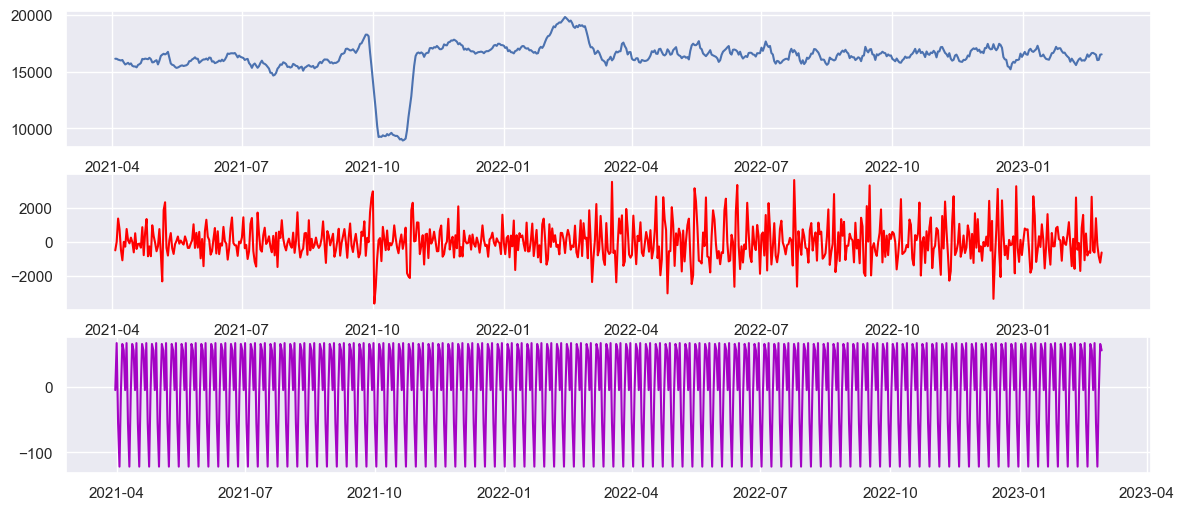

In [30]:
#affichage de la décomposition de la moyenne mobile 30 jours en tendance, saisonnalité et résidus
sm_test = sm.tsa.seasonal_decompose(df_day["global_ca"][period:])
trend = sm_test.trend
season = sm_test.seasonal
resid = sm_test.resid
fig, ax = plt.subplots(nrows = 3, ncols=1, figsize=(14,6))
ax[0].plot(trend, label="trend")
ax[1].plot(resid, label="resid", color="red")
ax[2].plot(season, label="season", color="#a403c4")
plt.show()

<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">5.2 - Nombre de ventes</h1>
</div>

In [31]:
#creation d'une colonne avec la moyenne mobile des ventes calculée sur 30 jours
df_day["rolling_avg_tr"] = df_day["global_tr"].rolling(window=period).mean().to_frame()

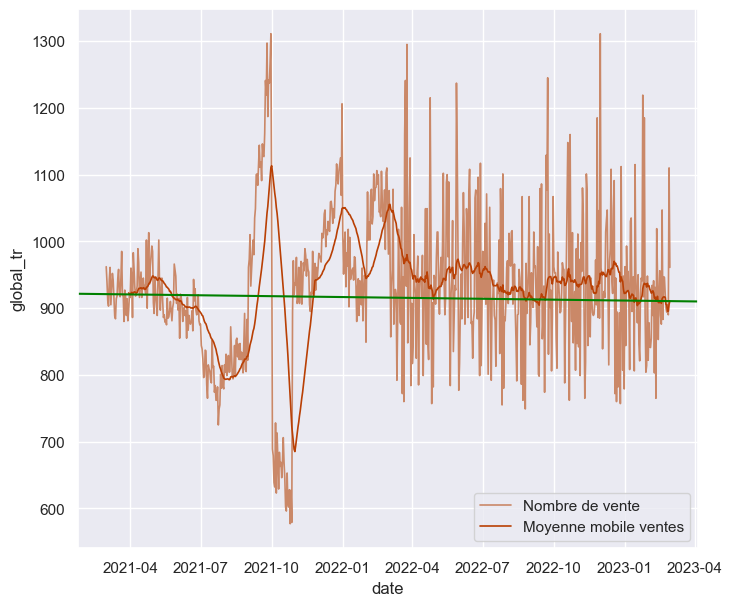

In [32]:
#graphiques représentant l'évolution du chiffre d'affaires par semaine et par mois avec ajout de la moyenne mobile (30)
date_1 = (datetime.datetime(2021,3,1) - datetime.datetime(1970,1,1)).days +31
date_2 = (datetime.datetime(2023,2,28) - datetime.datetime(1970,1,1)).days
sns.set_theme(rc={'figure.figsize':(8,7)})
sns.lineplot(data=df_day, x=df_day.index ,y="global_tr", color="#ca8868", label="Nombre de vente", linewidth=1.2)
sns.lineplot(data=df_day, x=df_day.index ,y="rolling_avg_tr", color="#b94005", label="Moyenne mobile ventes", linewidth=1.2)
plt.axline((date_1,df_day["rolling_avg_tr"][31]),(date_2,df_day["rolling_avg_tr"][-1]),color="green")
plt.show()
#la baisse d'activité ne prend pas la forme sur le graphique en nombre de vente, nous en apprendrons plus en nous concentrant sur les catégories

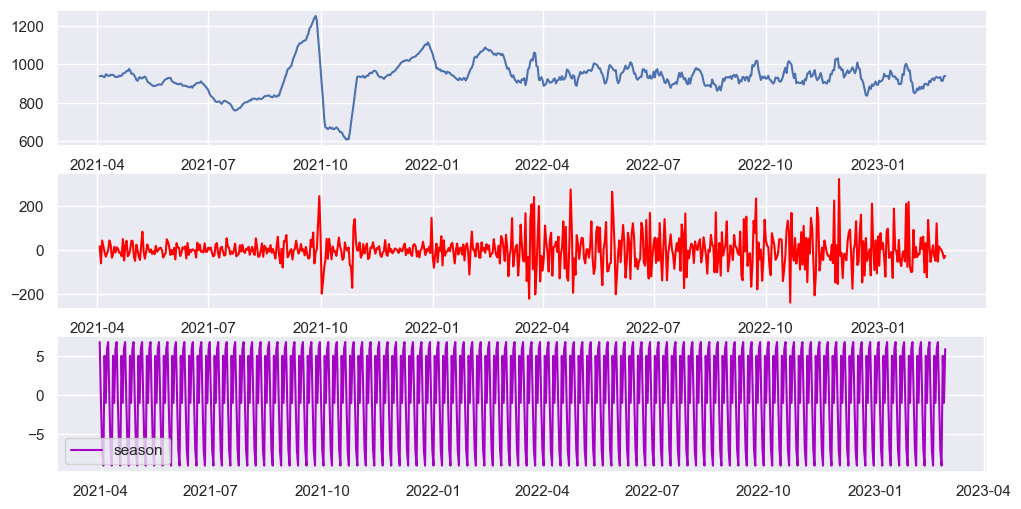

In [33]:
#affichage de la décomposition de la moyenne mobile 30 jours en tendance, saisonnalité et résidus
sm_test = sm.tsa.seasonal_decompose(df_day["global_tr"][period:])
trend = sm_test.trend
season = sm_test.seasonal
resid = sm_test.resid
fig, ax = plt.subplots(nrows = 3, ncols=1, figsize=(12,6))
ax[0].plot(trend, label="trend")
ax[1].plot(resid, label="resid", color="red")
ax[2].plot(season, label="season", color="#a403c4")
plt.legend()
plt.show()

<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">5.3 - Produits</h1>
</div>

In [34]:
#creation de dataframe regroupant les ventes et le chiffre d'affaires par produit
df_ca_tr_product = df.copy()
df_ca_tr_product = df_ca_tr_product.groupby(["id_prod"], as_index=False).agg(gross_sale=('price', 'sum'), number_sale=('price', 'count'))

#Top 10 produits / Top 1% des produits (chiffre d'affaires)
df_ca_tr_product = df_ca_tr_product.sort_values("gross_sale", ascending=False)
top_10_product_ca = df_ca_tr_product.loc[df_ca_tr_product["gross_sale"] != 0,["gross_sale","id_prod"]].head(10)
top_10_product_ca["prop_ca"] = top_10_product_ca["gross_sale"] / ca_total *100
top_10_product_ca["categ"] = top_10_product_ca["id_prod"].str[:1]
top_10_product_ca = pd.merge(top_10_product_ca, df_ca_tr_product.loc[:,["id_prod","number_sale"]], on ="id_prod", how="left")
print(top_10_product_ca)
#Top 10 produits / Top 1% des produits (nombre de vente)
df_ca_tr_product = df_ca_tr_product.sort_values("number_sale", ascending=False)
top_10_product_tr = df_ca_tr_product.loc[df_ca_tr_product["number_sale"] != 0,["number_sale","id_prod"]].head(10)
top_10_product_tr["prop_tr"] = top_10_product_tr["number_sale"] / tr_total *100
top_10_product_tr["categ"] = top_10_product_tr["id_prod"].str[:1]
top_10_product_tr = pd.merge(top_10_product_tr, df_ca_tr_product.loc[:,["id_prod","gross_sale"]], on ="id_prod", how="left")
print(top_10_product_tr)
#On remarque donc que la catégorie 2 est présente en majorité pour les produits qui génère le plus de CA
#Pour le nombre de vente la catégorie prédominante est la catégorie 1

   gross_sale id_prod   prop_ca categ  number_sale
0    94893.50   2_159  0.800537     2          650
1    69334.95   2_135  0.584921     2         1005
2    65407.76   2_112  0.551791     2          968
3    60736.78   2_102  0.512385     2         1027
4    56971.86   2_209  0.480624     2          814
5    54356.25   1_395  0.458558     1         1875
6    54025.48   1_369  0.455768     1         2252
7    53846.25   2_110  0.454256     2          865
8    53060.85    2_39  0.447630     2          915
9    52449.12   2_166  0.442469     2          228
   number_sale id_prod   prop_tr categ  gross_sale
0         2252   1_369  0.331610     1    54025.48
1         2189   1_417  0.322333     1    45947.11
2         2180   1_414  0.321008     1    51949.40
3         2128   1_498  0.313351     1    49731.36
4         2096   1_425  0.308639     1    35611.04
5         1960   1_403  0.288613     1    35260.40
6         1951   1_412  0.287287     1    32484.15
7         1945   1_413  0.28640

In [35]:
# Bottom 10 / bottom 1% des produits (chiffre d'affaires)
df_ca_tr_product = df_ca_tr_product.sort_values("gross_sale", ascending=True)
bot_10_product_ca = df_ca_tr_product.loc[df_ca_tr_product["gross_sale"] != 0,["gross_sale","id_prod"]].head(10)
bot_10_product_ca["prop_ca"] = bot_10_product_ca["gross_sale"] / ca_total *100
bot_10_product_ca["categ"] = bot_10_product_ca["id_prod"].str[:1]
bot_10_product_ca = pd.merge(bot_10_product_ca, df_ca_tr_product.loc[:,["id_prod","number_sale"]], on ="id_prod", how="left")
print(bot_10_product_ca)
#Bot 10 produits / bot 1% des produits (nombre de vente)
df_ca_tr_product = df_ca_tr_product.sort_values("number_sale", ascending=True)
bot_10_product_tr = df_ca_tr_product.loc[df_ca_tr_product["number_sale"] != 0,["number_sale","id_prod"]].head(10)
bot_10_product_tr["prop_tr"] = bot_10_product_tr["number_sale"] / tr_total *100
bot_10_product_tr["categ"] = bot_10_product_tr["id_prod"].str[:1]
bot_10_product_tr = pd.merge(bot_10_product_tr, df_ca_tr_product.loc[:,["id_prod","gross_sale"]], on ="id_prod", how="left")
print(bot_10_product_tr)
#Pour les produits générants le moins de chiffres d'affaires, nous retrouvons la catégorie 0 en majorité
#Et il en va de même pour le nombre de ventes

   gross_sale id_prod   prop_ca categ  number_sale
0        0.99  0_1539  0.000008     0            1
1        1.38  0_1284  0.000012     0            1
2        1.98  0_1653  0.000017     0            2
3        1.99   0_807  0.000017     0            1
4        1.99  0_1601  0.000017     0            1
5        1.99   0_541  0.000017     0            1
6        2.27  0_1728  0.000019     0            1
7        2.48  0_1498  0.000021     0            1
8        2.54   0_898  0.000021     0            2
9        2.56  0_1840  0.000022     0            2
   number_sale id_prod   prop_tr categ  gross_sale
0            1  0_1539  0.000147     0        0.99
1            1    2_81  0.000147     2       86.99
2            1  0_2201  0.000147     0       20.99
3            1    2_23  0.000147     2      115.99
4            1  0_1633  0.000147     0       24.99
5            1   0_886  0.000147     0       21.82
6            1  0_1151  0.000147     0        2.99
7            1   0_833  0.00014

Le pourcentage de produits qui représentent 80% du CA est : 21.47% Donc la loi de pareto est respéctée pour le chiffre d'affaires.
Le pourcentage de produits qui représentent 80% des ventes est : 24.84% Donc la loi de pareto est aussi respéctée pour les ventes.


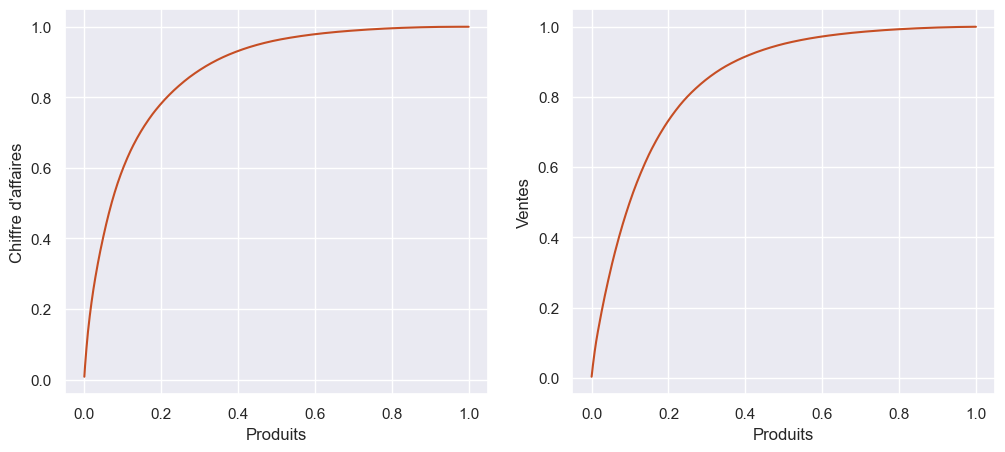

In [36]:
#analyse pareto
#produits représentant 80% du CA
fig, ax = plt.subplots(1,2, figsize=(12,5))
df_ca_tr_product = df_ca_tr_product.sort_values("gross_sale", ascending=False)
df_ca_tr_product["prop_ca"] = df_ca_tr_product["gross_sale"] / ca_total
df_ca_tr_product["cumul_ca_prop"] = df_ca_tr_product["prop_ca"].cumsum()
df_top80ca = df_ca_tr_product.loc[df_ca_tr_product["cumul_ca_prop"] <0.8]
df_ca_tr_product.reset_index(drop=True, inplace=True)
df_ca_tr_product["percent_index"] = df_ca_tr_product.index/len(df_ca_tr_product)

ax[0].plot(df_ca_tr_product["percent_index"], df_ca_tr_product["cumul_ca_prop"], color="#c64e24")
ax[0].set_xlabel(xlabel="Produits")
ax[0].set_ylabel(ylabel="Chiffre d'affaires")
print(f"Le pourcentage de produits qui représentent 80% du CA est : {round(((len(df_top80ca)/len(df_ca_tr_product))*100),2)}% Donc la loi de pareto est respéctée pour le chiffre d'affaires.")
#produits représentant 80% des ventes
df_ca_tr_product = df_ca_tr_product.sort_values("number_sale", ascending=False)
df_ca_tr_product["prop_tr"] = df_ca_tr_product["number_sale"] / tr_total
df_ca_tr_product["cumul_tr_prop"] = df_ca_tr_product["prop_tr"].cumsum()
df_top80tr = df_ca_tr_product.loc[df_ca_tr_product["cumul_tr_prop"] <0.8]
df_ca_tr_product.reset_index(drop=True, inplace=True)
df_ca_tr_product["percent_index"] = df_ca_tr_product.index/len(df_ca_tr_product)

ax[1].plot(df_ca_tr_product["percent_index"], df_ca_tr_product["cumul_tr_prop"], color="#c64e24")
ax[1].set_xlabel(xlabel="Produits")
ax[1].set_ylabel(ylabel="Ventes")
print(f"Le pourcentage de produits qui représentent 80% des ventes est : {round(((len(df_top80tr)/len(df_ca_tr_product))*100),2)}% Donc la loi de pareto est aussi respéctée pour les ventes.")

<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">5.4 - Catégorie de produit</h1>
</div>

In [37]:
# Analyse des chiffres d'affaires par catégorie
df_categ = df.groupby(["categ"], as_index=False).agg(gross_sale=('price', 'sum'), number_sale=('price', 'count'))
df_categ.head()
# Nombre de ventes par catégorie

,categ,gross_sale,number_sale
0,0.0,4419730.97,415459
1,1.0,4653722.69,227169
2,2.0,2780275.02,36483


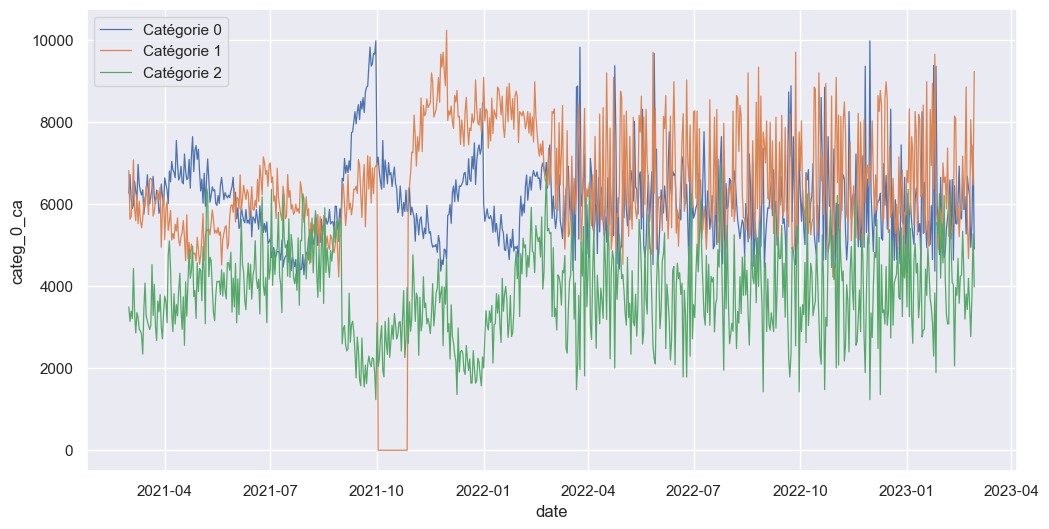

In [38]:
#graphique de l'évolution des chiffres d'affaires par catégories
sns.set_theme(rc={'figure.figsize':(12,6)})
sns.lineplot(data=df_day, x=df_day.index ,y="categ_0_ca", color="#4c72b0", label="Catégorie 0", linewidth=0.9)
sns.lineplot(data=df_day, x=df_day.index ,y="categ_1_ca", color="#dd8452", label="Catégorie 1", linewidth=0.9)
sns.lineplot(data=df_day, x=df_day.index ,y="categ_2_ca", color="#55a868", label="Catégorie 2", linewidth=0.9)
plt.show()
#On remarque que la catégorie 2 a connu une baisse des ventes importantes en aout/septembre 2021 et que la catégorie 1 est tombé à 0 en Octobre 2021

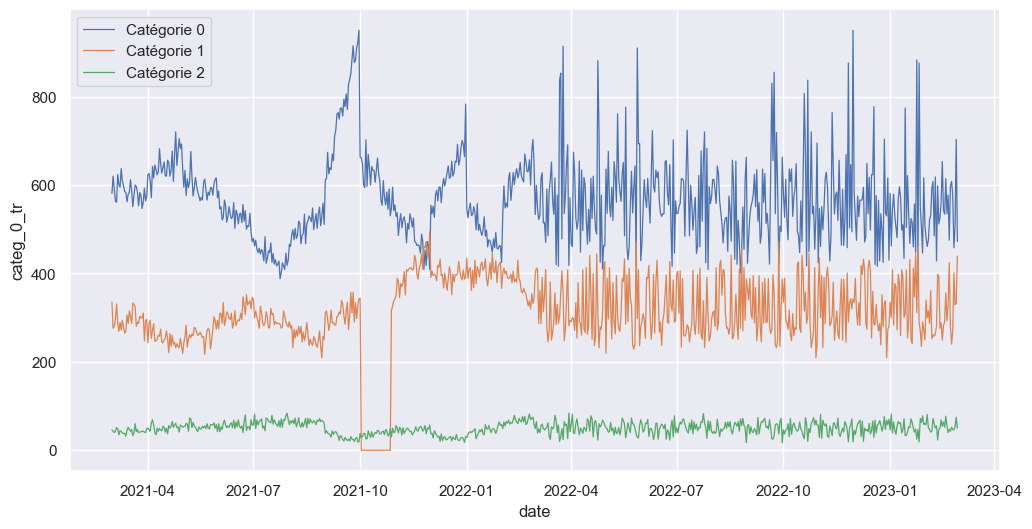

In [39]:
#graphique de l'évolution des chiffres d'affaires par catégories
sns.set_theme(rc={'figure.figsize':(12,6)})
sns.lineplot(data=df_day, x=df_day.index ,y="categ_0_tr", color="#4c72b0", label="Catégorie 0", linewidth=0.9)
sns.lineplot(data=df_day, x=df_day.index ,y="categ_1_tr", color="#dd8452", label="Catégorie 1", linewidth=0.9)
sns.lineplot(data=df_day, x=df_day.index ,y="categ_2_tr", color="#55a868", label="Catégorie 2", linewidth=0.9)
plt.show()
# On remarque ici que les baisses de chiffres d'affaires sont en parties expliqués par les nombres de ventes, mais pas totalement
# La baisse du CA entre aout et septembre 2021 pour la catégorie 2 ne se traduit pas par une baisse des ventes aussi importante pendant la même période

In [40]:
#On fait la moyenne du prix avant et après la période manquante
number_missing_day = len(df_day.loc[df_day["categ_1_ca"] ==0])
replace_price = (df_day.loc[df_day.index =="2021-10-01","categ_1_ca"].values[0] + df_day.loc[df_day.index =="2021-10-28","categ_1_ca"].values[0])/2
df_day.loc[df_day["categ_1_ca"] == 0, "categ_1_ca"] = replace_price

In [41]:
#On fait la moyenne de transactions avant et après la période manquante
replace_transaction = (df_day.loc[df_day.index =="2021-10-01","categ_1_tr"].values[0] + df_day.loc[df_day.index =="2021-10-28","categ_1_tr"].values[0])/2
df_day.loc[df_day["categ_1_tr"] == 0, "categ_1_tr"] = replace_transaction

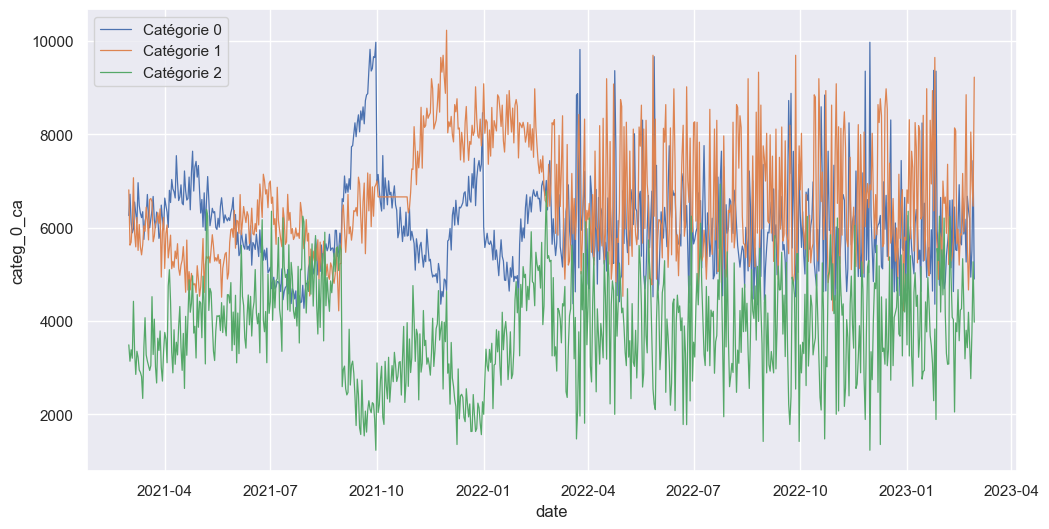

In [42]:
#Réaffichage du graphique après modification
sns.set_theme(rc={'figure.figsize':(12,6)})
sns.lineplot(data=df_day, x=df_day.index ,y="categ_0_ca", color="#4c72b0", label="Catégorie 0", linewidth=0.9)
sns.lineplot(data=df_day, x=df_day.index ,y="categ_1_ca", color="#dd8452", label="Catégorie 1", linewidth=0.9)
sns.lineplot(data=df_day, x=df_day.index ,y="categ_2_ca", color="#55a868", label="Catégorie 2", linewidth=0.9)
plt.show()

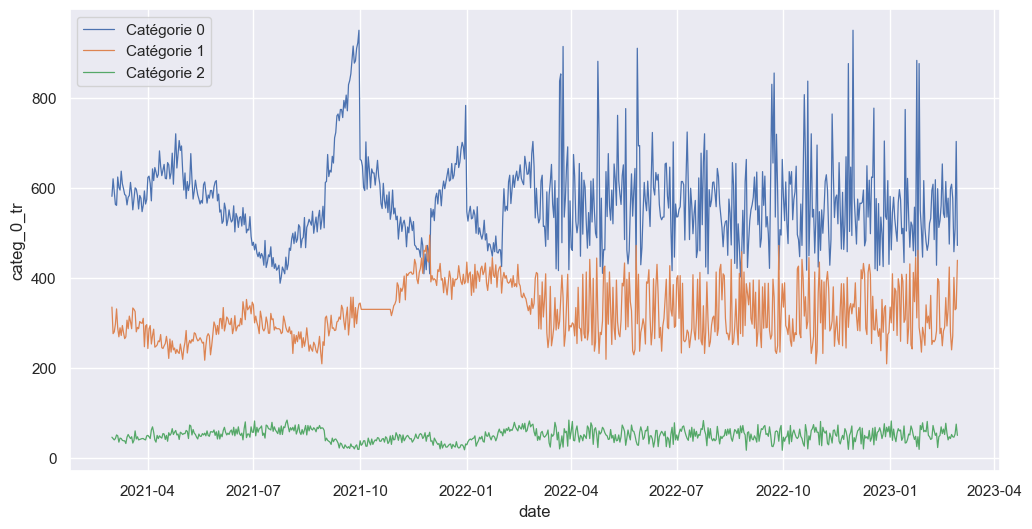

In [43]:
#Réaffichage du graphique des ventes après modification
sns.set_theme(rc={'figure.figsize':(12,6)})
sns.lineplot(data=df_day, x=df_day.index ,y="categ_0_tr", color="#4c72b0", label="Catégorie 0", linewidth=0.9)
sns.lineplot(data=df_day, x=df_day.index ,y="categ_1_tr", color="#dd8452", label="Catégorie 1", linewidth=0.9)
sns.lineplot(data=df_day, x=df_day.index ,y="categ_2_tr", color="#55a868", label="Catégorie 2", linewidth=0.9)
plt.legend()
plt.show()

In [44]:
# Je dois aussi corrigé mes valeurs de CA sur le dataframe global utilisé dans les corrélations
df_day.loc[(df_day.index >="2021-10-02") & (df_day.index <="2021-10-27"),"global_ca"] = df_day.loc[(df_day.index >="2021-10-02") & (df_day.index <="2021-10-27"),"global_ca"] + replace_price
df_day.loc[(df_day.index >="2021-10-02") & (df_day.index <="2021-10-27"),"global_tr"] = df_day.loc[(df_day.index >="2021-10-02") & (df_day.index <="2021-10-27"),"global_tr"] + replace_transaction

In [45]:
df_month.loc[df_month.index =="2021-10-31", "categ_1_ca"] +=number_missing_day*replace_price
df_month.loc[df_month.index =="2021-10-31", "global_ca"] +=number_missing_day*replace_price

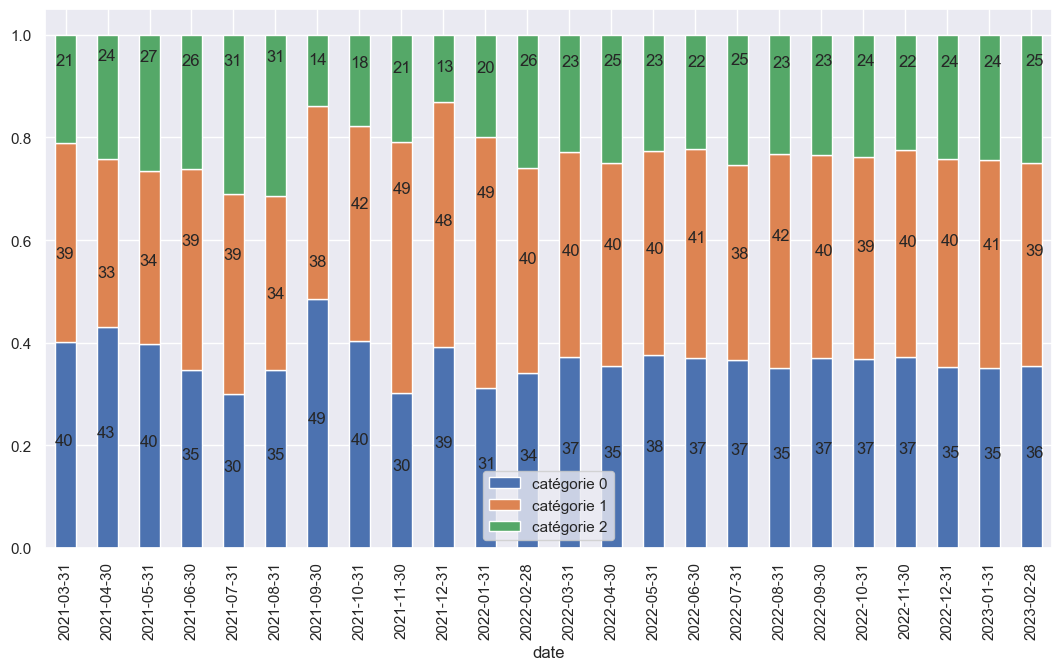

In [46]:
#affichage des proportions de chiffres d'affaires par catégories de produits regroupés par mois
df_month["prop_0_ca"] = df_month["categ_0_ca"] / df_month["global_ca"]
df_month["prop_1_ca"] = df_month["categ_1_ca"] / df_month["global_ca"]
df_month["prop_2_ca"] = df_month["categ_2_ca"] / df_month["global_ca"]
sns.set_theme(rc={'figure.figsize':(13,7)})
ax = df_month[["prop_0_ca", "prop_1_ca", "prop_2_ca"]].plot.bar(stacked=True)
df_month["index"] = df_month.index
df_month["index"]= df_month["index"].astype("str")
plt.xticks(list(range(len(df_month))), df_month["index"])
plt.legend(labels=["catégorie 0", "catégorie 1" ,"catégorie 2"], loc="lower center")
value_1 = []
value_2 = []
x=0
for p in ax.patches:
    if x < len(df_month) :
        value_1.append(p.get_height())
        ax.annotate(str(round(p.get_height()*100)), (p.get_x() * 1.005, p.get_height() * 0.5))
    elif x-len(df_month) < len(df_month) :
        value_2.append(p.get_height())
        ax.annotate(str(round(p.get_height()*100)), (p.get_x() * 1.005, p.get_height() + value_1[x-len(df_month)-1]* 0.5))
    else  :
        ax.annotate(str(round(p.get_height()*100)), (p.get_x() * 1.005, p.get_height() + value_1[x-len(df_month)*2] + value_2[x-len(df_month)*2]*0.85))
    x+=1
plt.show()
#On voit ici que la catégorie 2 est dernière malgré le fait que la plupart des top produits proviennent de cette catégorie

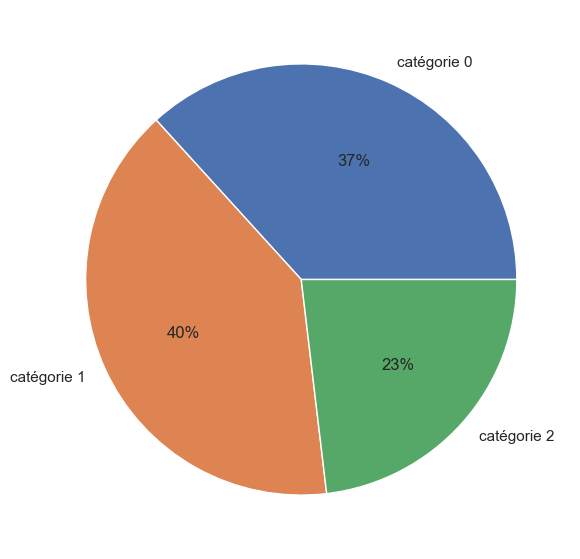

In [47]:
#graphique montrant la proportion de chiffre d'affaires par catégorie au global
ca_0 = df_month["categ_0_ca"].sum()
ca_1 = df_month["categ_1_ca"].sum()
ca_2 = df_month["categ_2_ca"].sum()
labels = ["catégorie 0", "catégorie 1", "catégorie 2"]
plt.pie([ca_0, ca_1, ca_2],labels=labels, autopct='%1.0f%%')
plt.show()

<div style="display: flex; background-color: #7a310c;" >
<h1 style="margin: auto; padding: 20px; ">6. Analyse des clients</h1>
</div>

<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">6.1 - Indicateurs généraux</h1>
</div>

In [48]:
#construction d'un dataframe clients contenant toutes leurs caractéristiques : fréquence d'achat, panier moyen, total depensé...
df_clients = df.groupby(["client_id"], as_index=False).agg(gross_sale=('price', 'sum'),
                                                           number_sale=('price', 'count'),
                                                           age=('age', 'first'),
                                                           sex=('sex', 'first'),
                                                           buying_frequency=('session_id', 'nunique'))

Le pourcentage de clients qui représentent 80% du CA est : 49.92%
Le pourcentage de clients qui représentent 80% des ventes est : 45.99%


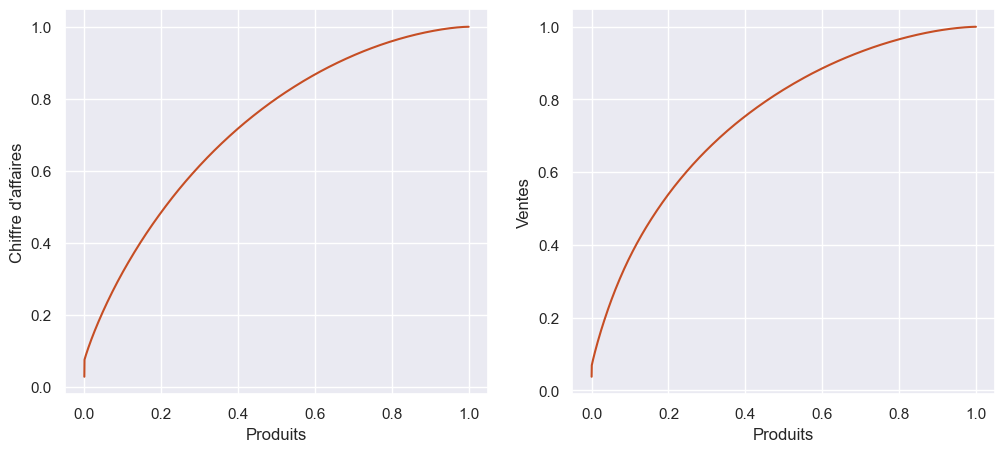

In [49]:
#analyse pareto
fig, ax = plt.subplots(1,2, figsize=(12,5))
#clients représentant 80% du CA
#tri par ordre décroissant de total dépensé par client
df_clients = df_clients.sort_values(["gross_sale"], ascending=False)

df_clients["ca_prop"] = df_clients["gross_sale"]/ca_total
df_clients.reset_index(drop=True, inplace=True)
df_clients["percent_index"] = df_clients.index/len(df_clients)
df_clients["cumul_ca_prop"] = df_clients["ca_prop"].cumsum()
df_top80ca_cl = df_clients.loc[df_clients["cumul_ca_prop"] <0.8]
print(f"Le pourcentage de clients qui représentent 80% du CA est : {round(((len(df_top80ca_cl)/len(df_clients))*100),2)}%")

ax[0].plot(df_clients["percent_index"], df_clients["cumul_ca_prop"], color="#c64e24")
ax[0].set_xlabel(xlabel="Produits")
ax[0].set_ylabel(ylabel="Chiffre d'affaires")

#clients représentant 80% des ventes
#tri par ordre décroissant de nombre d'achat par client
df_clients = df_clients.sort_values(["number_sale"], ascending=False)
df_clients["tr_prop"] = df_clients["number_sale"]/tr_total
df_clients.reset_index(drop=True, inplace=True)
df_clients["percent_index"] = df_clients.index/len(df_clients)
df_clients["cumul_tr_prop"] = df_clients["tr_prop"].cumsum()
df_top80tr_cl = df_clients.loc[df_clients["cumul_tr_prop"] <0.8]
print(f"Le pourcentage de clients qui représentent 80% des ventes est : {round(((len(df_top80tr_cl)/len(df_clients))*100),2)}%")

ax[1].plot(df_clients["percent_index"], df_clients["cumul_tr_prop"], color="#c64e24")
ax[1].set_xlabel(xlabel="Produits")
ax[1].set_ylabel(ylabel="Ventes")
plt.show()
#La loi de pareto n'est pas vraiment respectée en ce qui concerne les clients.
#On remarque tout de même que les 4 premiers clients représentent à eux seuls environ 7.4% du chiffre d'affaires total

In [50]:
# Top 10 clients
#Chiffre d'affaires
df_clients = df_clients.sort_values(["gross_sale"], ascending=False)
print(df_clients[["client_id","gross_sale","number_sale"]].head(10))
df_clients[["client_id","gross_sale","number_sale"]].head(10).to_csv(index=True, path_or_buf=f"{path_2}\\top_10_clients.csv")
#Ventes
df_clients = df_clients.sort_values(["number_sale"], ascending=False)
print(df_clients[["client_id","gross_sale","number_sale"]].head(10))

#on retrouve les 4 mêmes premiers clients en nombre de ventes et chiffre d'affaires

     client_id  gross_sale  number_sale
0       c_1609   324033.35        25488
3       c_4958   289760.34         5195
1       c_6714   153598.92         9181
2       c_3454   113637.93         6770
4       c_3263     5276.87          403
17      c_1570     5271.62          369
1883    c_2899     5214.05          105
5       c_2140     5208.82          402
15      c_7319     5155.77          371
16      c_7959     5085.45          369
  client_id  gross_sale  number_sale
0    c_1609   324033.35        25488
1    c_6714   153598.92         9181
2    c_3454   113637.93         6770
3    c_4958   289760.34         5195
4    c_3263     5276.87          403
5    c_2140     5208.82          402
6    c_2595     4959.66          398
7    c_2077     4816.78          384
8    c_1637     4698.87          380
9    c_7421     5050.20          379


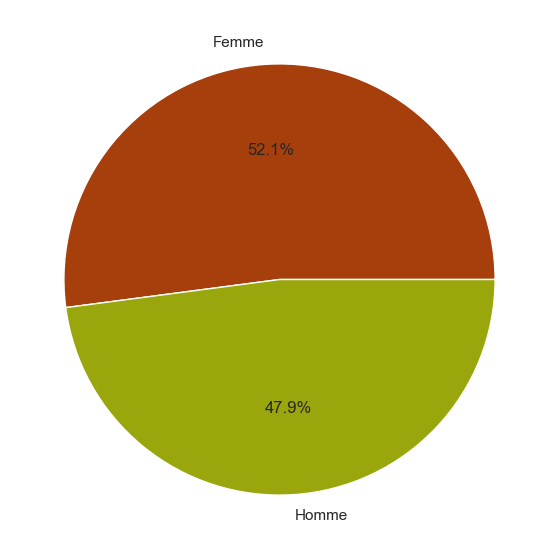

In [51]:
#pieplot de la répartition des clients par sexe
df_sex_rep = [len(df_clients.loc[df_clients["sex"] == "f"]), len(df_clients.loc[df_clients["sex"] == "m"])]
labels = ["Femme", "Homme"]
plt.pie(df_sex_rep, labels=labels, autopct='%1.1f%%', colors=["#a73f0c", "#99a70c"])
plt.show()

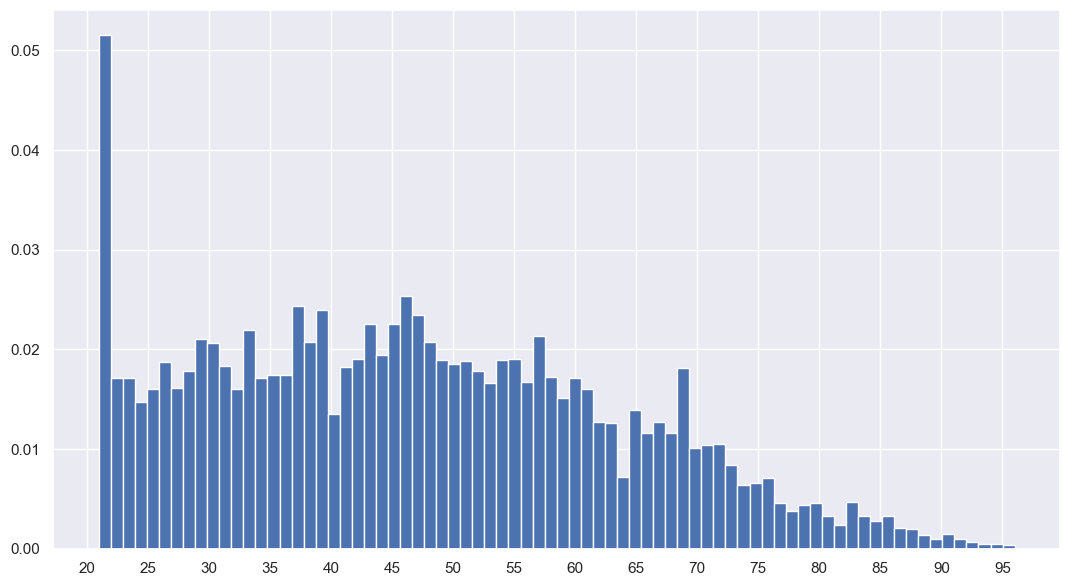

In [52]:
#Histogramme en fonction de l'age des clients
plt.hist(df_clients["age"],bins=len(df_clients["age"].unique()), density=True)
ax = plt.gca()
ax.set_xticks(ticks=range(df_clients["age"].min()-1, df_clients["age"].max(),5))
plt.show()
#On s'intéresse ici à la répartition des clients en fonction de leur age on peut trouver un nombre de clients très importants ayant 21 ans
#Il se peut que ce pic soit issu de la limite d'age minimum nécessaire pour s'inscrire sur notre site

In [53]:
#creation d'une colonne regroupant les articles par session (pour calculer la taille du panier)
df_clients["basket_size"] = df_clients["gross_sale"] / df_clients["buying_frequency"]
df_clients = df_clients.sort_values("basket_size", ascending=False)
print(df_clients.head(10))
avg_basket = df_clients["basket_size"].mean()
print(f"Le panier moyen pour un client est de : {round(avg_basket,2)}€")

     client_id  gross_sale  number_sale  age sex  buying_frequency   ca_prop  \
8289    c_2369     1037.69            7   26   f                 4  0.000088   
8512    c_7941      482.32            4   21   m                 2  0.000041   
7309    c_5903     1154.41           19   29   f                 5  0.000097   
5433     c_317     1527.82           38   27   f                 8  0.000129   
8256    c_7585      732.29            8   31   m                 4  0.000062   
8577    c_4540      363.98            2   22   m                 2  0.000031   
8579    c_4391      363.98            2   24   f                 2  0.000031   
7103    c_1821      897.95           21   22   m                 5  0.000076   
6508    c_4969     1406.89           26   29   f                 8  0.000119   
8057    c_5230      875.65           10   28   m                 5  0.000074   

      percent_index  cumul_ca_prop   tr_prop  cumul_tr_prop  basket_size  
8289       0.963837       0.797532  0.000010

In [54]:
#fréquence d'achat par client
df_clients.loc[df_clients["gross_sale"] < 100000]
avg_frequency = df_clients["buying_frequency"].mean()
print(f"La fréquence d'achat moyenne des clients est de : {round(avg_frequency,2)}")

La fréquence d'achat moyenne des clients est de : 39.8


<div style="display: flex; background-color: #a75d38;" >
<h1 style="margin: auto; padding: 20px; ">6.2 - Corrélations</h1>
</div>

<div style="display: flex; background-color: #e18658;" >
<h1 style="margin: auto; padding: 20px; ">6.2.1 - Tests de normalité</h1>
</div>

In [55]:
#on retire les 4 clients plus importants sur les dataframe principaux et celui des clients (pour ne pas biaiser les résultats)
df_clients = df_clients.loc[df_clients["gross_sale"] < 100000]
df = df.loc[~df["client_id"].isin(["c_1609", "c_4958", "c_6714", "c_3454"])]

In [56]:
#On effectue des tests de Shapiro-Wilk pour voir si nos variables suivent une loi normales
#On réordonne au hasard nos listes de valeurs avant de prendre un echantillon de 5000 unités, pour éviter d'avoir des biais due à nos "df.sort_values"
print("L'hypothèse nulle est que notre variable est distribuée de manière normale")
print("L'hypothèse alternative est que notre variable n'est pas distribuée de manière normale")
# Seuil alpha
alpha = 0.05

L'hypothèse nulle est que notre variable est distribuée de manière normale
L'hypothèse alternative est que notre variable n'est pas distribuée de manière normale


In [57]:
#age des clients
df_test_normal_dist = df_clients["age"].copy().values
random.shuffle(df_test_normal_dist)
sample = df_test_normal_dist[0:4999]
stats, p = scipy.stats.shapiro(sample)
print("p-value :", p)
if p < alpha:
    print("Il est improbable d'obtenir ces valeurs en sachant qu'elles sont normalement distribuées. (accepter l'hypothèse alternative)")
else:
    print("Nos valeurs sont probablement normalement distribuées. (accepter l'hypothèse nulle)")

p-value : 3.1816321231833715e-31
Il est improbable d'obtenir ces valeurs en sachant qu'elles sont normalement distribuées. (accepter l'hypothèse alternative)


In [58]:
#chiffre d'affaires (quotidien)
df_test_normal_dist = df_day["global_ca"].copy().values
random.shuffle(df_test_normal_dist)
sample = df_test_normal_dist[0:4999]
stats, p = scipy.stats.shapiro(sample)
print("p-value :", p)
if p < alpha:
    print("Il est improbable d'obtenir ces valeurs en sachant qu'elles sont normalement distribuées. (accepter l'hypothèse alternative)")
else:
    print("Nos valeurs sont probablement normalement distribuées. (accepter l'hypothèse nulle)")

p-value : 1.8918617241722408e-12
Il est improbable d'obtenir ces valeurs en sachant qu'elles sont normalement distribuées. (accepter l'hypothèse alternative)


In [59]:
#fréquence d'achat
df_test_normal_dist = df_clients["buying_frequency"].copy().values
random.shuffle(df_test_normal_dist)
sample = df_test_normal_dist[0:4999]
stats, p = scipy.stats.shapiro(sample)
print("p-value :", p)
if p < alpha:
    print("Il est improbable d'obtenir ces valeurs en sachant qu'elles sont normalement distribuées. (accepter l'hypothèse alternative)")
else:
    print("Nos valeurs sont probablement normalement distribuées. (accepter l'hypothèse nulle)")

p-value : 4.476255553854458e-55
Il est improbable d'obtenir ces valeurs en sachant qu'elles sont normalement distribuées. (accepter l'hypothèse alternative)


In [60]:
#taille du panier moyen
df_test_normal_dist = df_clients["buying_frequency"].copy().values
random.shuffle(df_test_normal_dist)
sample = df_test_normal_dist[0:4999]
stats, p = scipy.stats.shapiro(sample)
print("p-value :", p)
if p < alpha:
    print("Il est improbable d'obtenir ces valeurs en sachant qu'elles sont normalement distribuées. (accepter l'hypothèse alternative)")
else:
    print("Nos valeurs sont probablement normalement distribuées. (accepter l'hypothèse nulle)")

p-value : 4.925937413143644e-55
Il est improbable d'obtenir ces valeurs en sachant qu'elles sont normalement distribuées. (accepter l'hypothèse alternative)


<div style="display: flex; background-color: #e18658;" >
<h1 style="margin: auto; padding: 20px; ">6.2.2 - Tests statistiques</h1>
</div>

<div style="display: flex; background-color: #f5b797;" >
<h1 style="margin: auto; padding: 8px; ">Corrélation entre age et catégorie de livres achetés</h1>
</div>

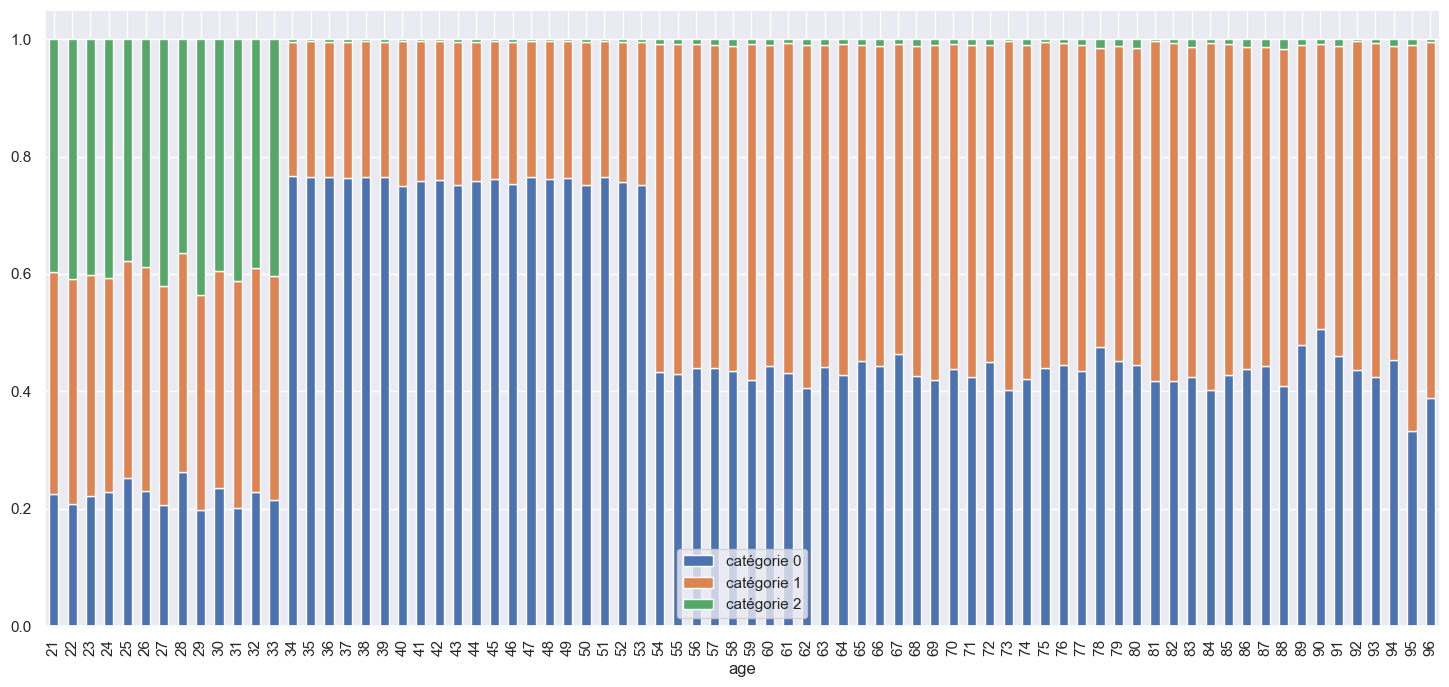

In [61]:
#on créer un dataframe qui va regrouper les nombres de ventes dans chacunes des catégories de produits, par age
#affichage d'un graphique en barres empilées 100% montrant la proportion de ventes par age
df_age_categ = df.groupby(["age","categ"], as_index=False).agg(categ_count=('price', 'count'))
df_age_categ = df_age_categ.pivot_table(columns="categ", values="categ_count", index="age")
df_age_categ["age"] = df_age_categ.index
df_age_categ["total"] = df_age_categ[0.0] + df_age_categ[1.0] + df_age_categ[2.0]
df_age_categ["prop_0"] = df_age_categ[0.0]/ df_age_categ["total"]
df_age_categ["prop_1"] = df_age_categ[1.0]/ df_age_categ["total"]
df_age_categ["prop_2"] = df_age_categ[2.0]/ df_age_categ["total"]
#Le graphique suivant nous montre que l'age à une corrélation négative importante avec les différentes proportions de livres achetés
sns.set_theme(rc={"figure.figsize":(18,8)})
# plt.xticks(list(range(df_clients['age'].min(), df_clients['age'].max())))
ax = df_age_categ.plot.bar(stacked=True,x="age", y=["prop_0", "prop_1", "prop_2"], figsize=(18, 8))
plt.legend(labels=["catégorie 0", "catégorie 1" ,"catégorie 2"], loc="lower center")
plt.show()

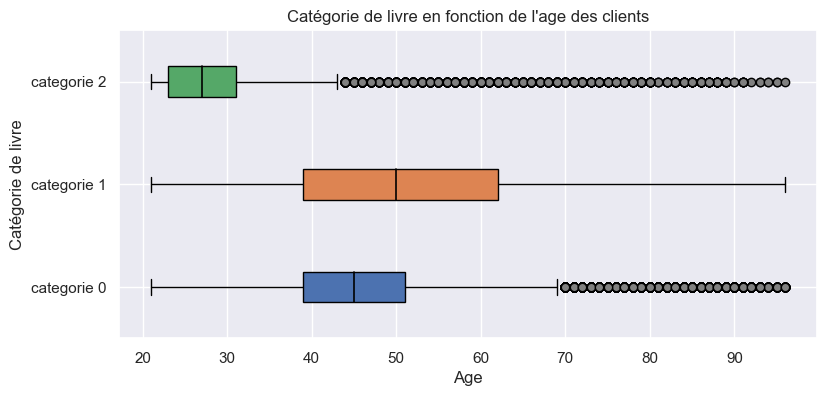

In [90]:
# affichage d'un boxplot montrant les ages de clients par catégorie de livre acheté
fig, ax = plt.subplots()
sns.set_theme(rc={"figure.figsize":(9,4)})
list_categ_age = [group['age'].values for name, group in df.groupby('categ')]
colors = ['#4c72b0','#dd8452','#55a868']
medianprops = dict(color="black",linewidth=1.2)
flierprops = dict(marker='o', markerfacecolor='gray', markersize=6,
                  linestyle='none')
bp = ax.boxplot(list_categ_age, vert=False, patch_artist=True, labels= ["categorie 0", "categorie 1", "categorie 2"],flierprops=flierprops, meanline=False, medianprops=medianprops)
ax.set_title("Catégorie de livre en fonction de l'age des clients")
ax.set_ylabel('Catégorie de livre')
ax.set_xlabel('Age')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

In [63]:
kruskal, p = scipy.stats.kruskal(*list_categ_age)
print("L'hypothèse nulle est qu'il n'y a pas de relation significative entre les deux variables")
print("L'hypothèse alternative est qu'il y a une relation significative entre les deux variables")

print(f"Kruskal Wallis: {kruskal}")
print(f"P-value: {p}")

# Seuil alpha de 5%
alpha = 0.05
if p < alpha:
    print("Il y a une relation significative entre les variables (accepter l'hypothèse alternative)")
else:
    print("Il n'y a pas de relation significative entre les variables (accepter l'hypothèse nulle)")

L'hypothèse nulle est qu'il n'y a pas de relation significative entre les deux variables
L'hypothèse alternative est qu'il y a une relation significative entre les deux variables
Kruskal Wallis: 72209.48289794501
P-value: 0.0
Il y a une relation significative entre les variables (accepter l'hypothèse alternative)


<div style="display: flex; background-color: #f5b797;" >
<h1 style="margin: auto; padding: 8px; ">Corrélation entre sexe et catégorie de livres achetés</h1>
</div>

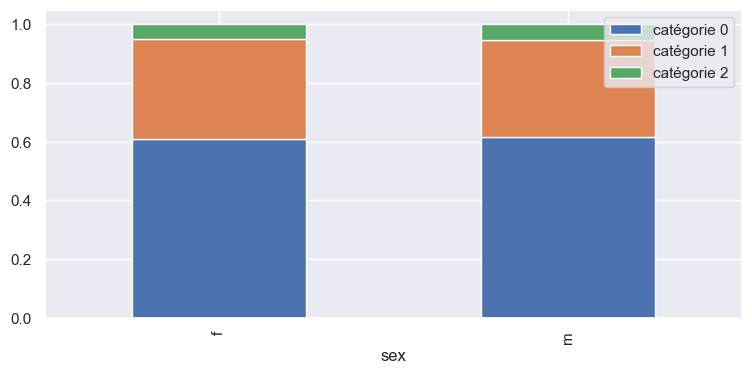

In [64]:
#on créer un dataframe qui va regrouper les nombres de ventes dans chacunes des catégories de produits, par sexe
df_sex_categ = pd.crosstab(df["sex"], df['categ'])
df_sex_categ["prop_0"] = df_sex_categ[0.0] / (df_sex_categ[0.0] + df_sex_categ[1.0] +df_sex_categ[2.0])
df_sex_categ["prop_1"] = df_sex_categ[1.0] / (df_sex_categ[0.0] + df_sex_categ[1.0] +df_sex_categ[2.0])
df_sex_categ["prop_2"] = df_sex_categ[2.0] / (df_sex_categ[0.0] + df_sex_categ[1.0] +df_sex_categ[2.0])
df_sex_categ[["prop_0","prop_1","prop_2"]].plot.bar(stacked=True)
plt.legend(labels=["catégorie 0", "catégorie 1" ,"catégorie 2"], loc="upper right")
plt.show()
#Nous ne voyons pas de différences significatives sur les proportions d'achat par catégorie entre les hommes et les femmes

In [65]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(df_sex_categ)
print("L'hypothèse nulle est qu'il n'y a pas de relation significative entre les deux variables")
print("L'hypothèse alternative est qu'il y a une relation significative entre les deux variables")

print(f"Chi2 Statistique: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Fréquences attendues:")
print(expected)
# Seuil alpha de 5%
alpha = 0.05
if p < alpha:
    print("Il y a une relation significative entre les variables (accepter l'hypothèse alternative)")
else:
    print("Il n'y a pas de relation significative entre les variables (accepter l'hypothèse nulle)")

L'hypothèse nulle est qu'il n'y a pas de relation significative entre les deux variables
L'hypothèse alternative est qu'il y a une relation significative entre les deux variables
Chi2 Statistique: 20.21684029595265
P-value: 0.0011378747438874925
Degrees of Freedom: 5
Fréquences attendues:
[[2.01518333e+05 1.10493453e+05 1.70921739e+04 6.37332563e-01
  3.49286803e-01 5.40634080e-02]
 [1.85762667e+05 1.01854547e+05 1.57558261e+04 5.87502861e-01
  3.21977893e-01 4.98364727e-02]]
Il y a une relation significative entre les variables (accepter l'hypothèse alternative)


<div style="display: flex; background-color: #f5b797;" >
<h1 style="margin: auto; padding: 8px; ">Corrélation entre age et total depensé</h1>
</div>

In [66]:
# Pour chacune des paires de variables qui sont quantitatives, nous allons calculer un test statistique de Spearman
# puisqu'aucune de nos variables ne suit une distribution normale

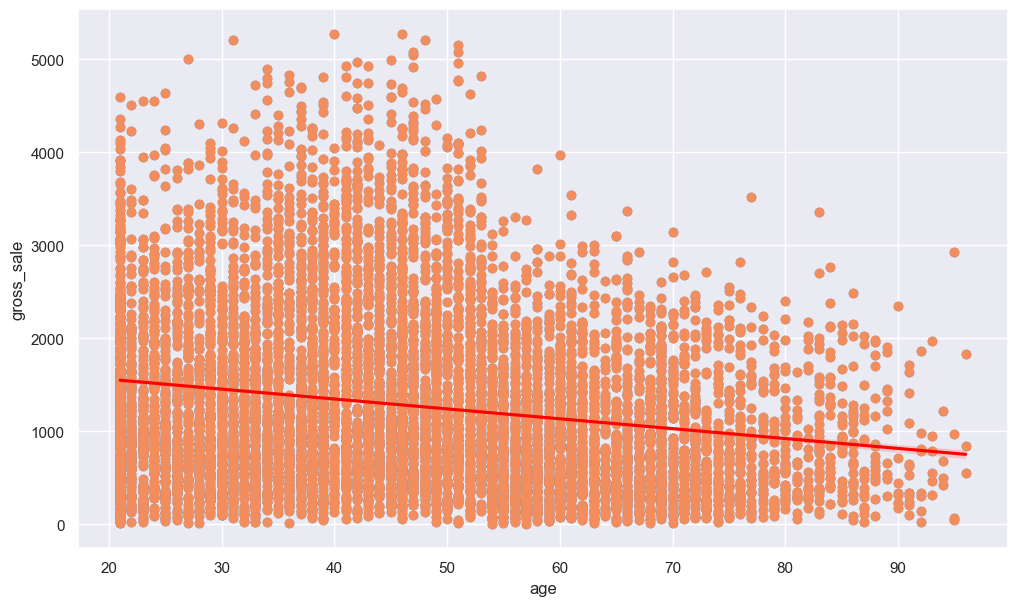

In [67]:
# Le graphique suivant nous montre, part sa droite de regression, une légère corrélation négative observée entre l'age et le total depensé
sns.set_theme(rc={"figure.figsize":(12,7)})
sns.regplot(x='age', y='gross_sale', data=df_clients, line_kws={'color': 'red'}) 
plt.scatter(x=df_clients["age"], y=df_clients["gross_sale"], color="#f28e5d")
plt.show()

In [68]:
corr, p_value = scipy.stats.spearmanr(df_clients['age'], df_clients["gross_sale"])
print("L'hypothèse nulle est qu'il n'y a pas de relation significative entre les deux variables")
print("L'hypothèse alternative est qu'il y a une relation significative entre les deux variables")

print(f"Coefficient de corrélation de Spearman: {corr}")
print(f"P-value: {p_value}")
# Seuil alpha de 5%
alpha = 0.05
if p < alpha:
    print("Il y a une relation significative entre les variables (accepter l'hypothèse alternative)")
else:
    print("Il n'y a pas de relation significative entre les variables (accepter l'hypothèse nulle)")

L'hypothèse nulle est qu'il n'y a pas de relation significative entre les deux variables
L'hypothèse alternative est qu'il y a une relation significative entre les deux variables
Coefficient de corrélation de Spearman: -0.1851392865536597
P-value: 3.78697439812248e-67
Il y a une relation significative entre les variables (accepter l'hypothèse alternative)


<div style="display: flex; background-color: #f5b797;" >
<h1 style="margin: auto; padding: 8px; ">Corrélation entre age et fréquence d'achat</h1>
</div>

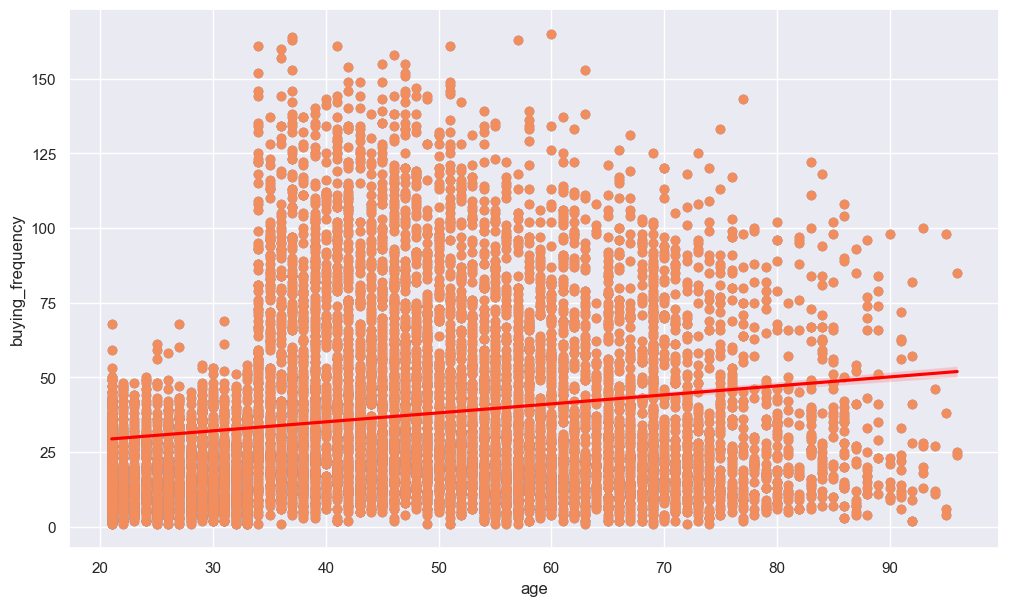

In [69]:
# Le graphique suivant nous montre, part sa droite de regression, une légère corrélation positive observée entre l'age et la fréquence d'achat
sns.set_theme(rc={"figure.figsize":(12,7)})
sns.regplot(x='age', y='buying_frequency', data=df_clients, line_kws={'color': 'red'}) 
plt.scatter(x=df_clients["age"], y=df_clients["buying_frequency"], color="#f28e5d")
plt.show()

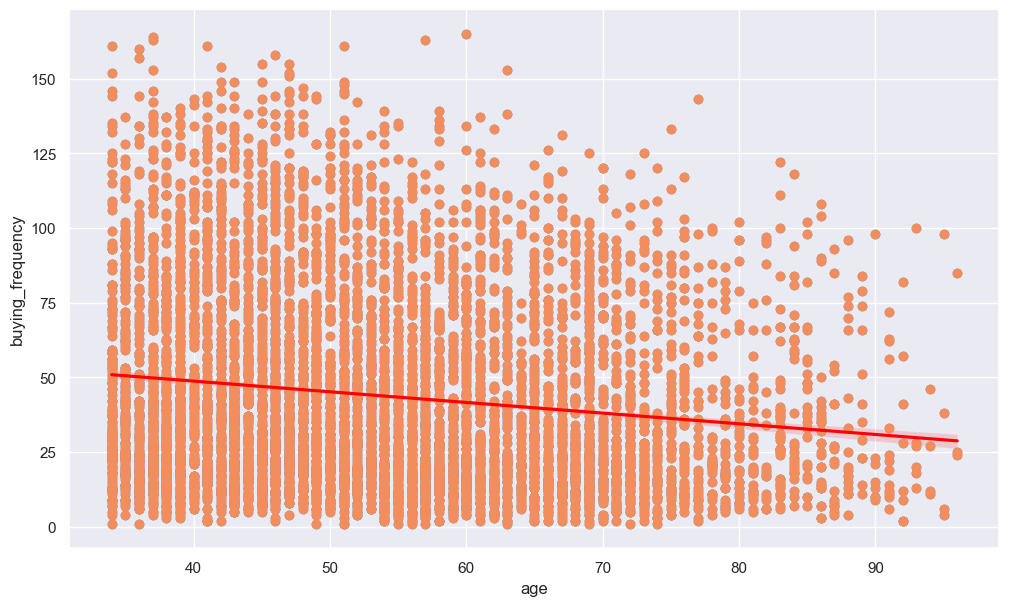

In [70]:
df_clients_older = df_clients.copy()
df_clients_older = df_clients_older.loc[df_clients_older["age"] >=34]
sns.set_theme(rc={"figure.figsize":(12,7)})
sns.regplot(x='age', y='buying_frequency', data=df_clients_older, line_kws={'color': 'red'}) 
plt.scatter(x=df_clients_older["age"], y=df_clients_older["buying_frequency"], color="#f28e5d")
plt.show()

In [71]:
corr, p_value = scipy.stats.spearmanr(df_clients['age'], df_clients["buying_frequency"])
print("L'hypothèse nulle est qu'il n'y a pas de relation significative entre les deux variables")
print("L'hypothèse alternative est qu'il y a une relation significative entre les deux variables")

print(f"Coefficient de corrélation de Spearman: {corr}")
print(f"P-value: {p_value}")
# Seuil alpha de 5%
alpha = 0.05
if p < alpha:
    print("Il y a une relation significative entre les variables (accepter l'hypothèse alternative)")
else:
    print("Il n'y a pas de relation significative entre les variables (accepter l'hypothèse nulle)")

L'hypothèse nulle est qu'il n'y a pas de relation significative entre les deux variables
L'hypothèse alternative est qu'il y a une relation significative entre les deux variables
Coefficient de corrélation de Spearman: 0.212296770973657
P-value: 3.5049079111602286e-88
Il y a une relation significative entre les variables (accepter l'hypothèse alternative)


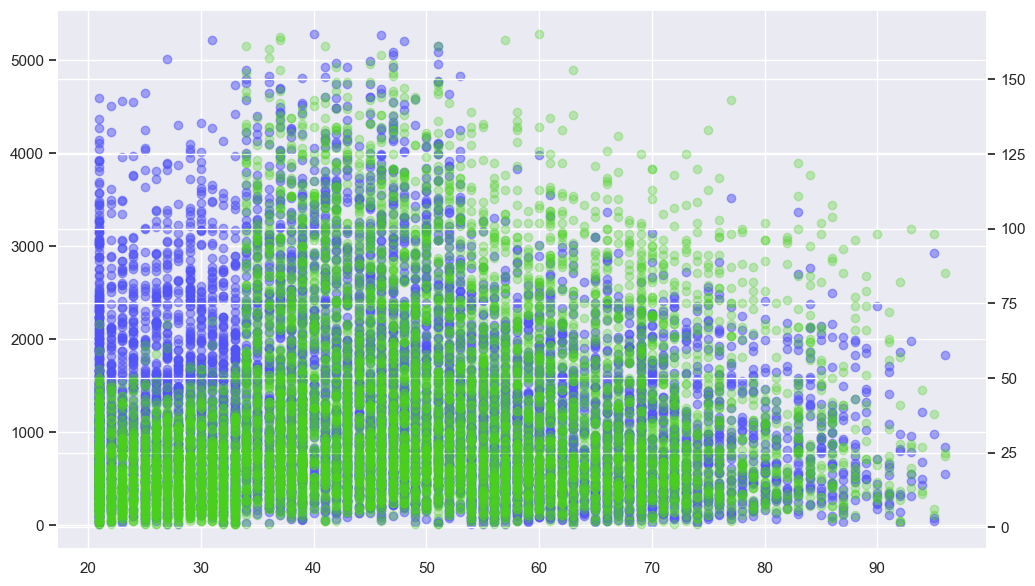

In [72]:
#Nuage de point entre age et taille du panier + fréquence d'achat
sns.set_theme(rc={"figure.figsize":(12,7)})
fig, ax1 = plt.subplots()
ax1.scatter(x=df_clients["age"], y=df_clients["gross_sale"], color="#5154f7", alpha=0.5)
ax2 = ax1.twinx()
plt.scatter(x=df_clients["age"], y=df_clients["buying_frequency"], color="#4ad21e", alpha=0.3)
plt.show()

In [73]:
df_34to54 = df_clients.loc[(df_clients["age"] > 33) & (df_clients["age"] < 55)]
df_less34 = df_clients.loc[(df_clients["age"] < 34)]
print(f"La tranche 34-54 ans représente {round((df_34to54['gross_sale'].sum() / ca_total*100),2)}% de notre chiffre d'affaires.")
print(f"La tranche 34-54 ans représente {round((df_34to54['number_sale'].sum() / tr_total*100),2)}% de nos ventes.")
print(f"La tranche de moins de 34 ans représente {round((df_less34['gross_sale'].sum() / ca_total*100),2)}% de notre chiffre d'affaires.")
# print(f"La tranche 34-54 ans représente {round((df_34to54['number_sale'].sum() / tr_total*100),2)}% de nos ventes.")

La tranche 34-54 ans représente 45.28% de notre chiffre d'affaires.
La tranche 34-54 ans représente 59.29% de nos ventes.
La tranche de moins de 34 ans représente 25.35% de notre chiffre d'affaires.


<div style="display: flex; background-color: #f5b797;" >
<h1 style="margin: auto; padding: 8px; ">Corrélation entre age et taille du panier</h1>
</div>

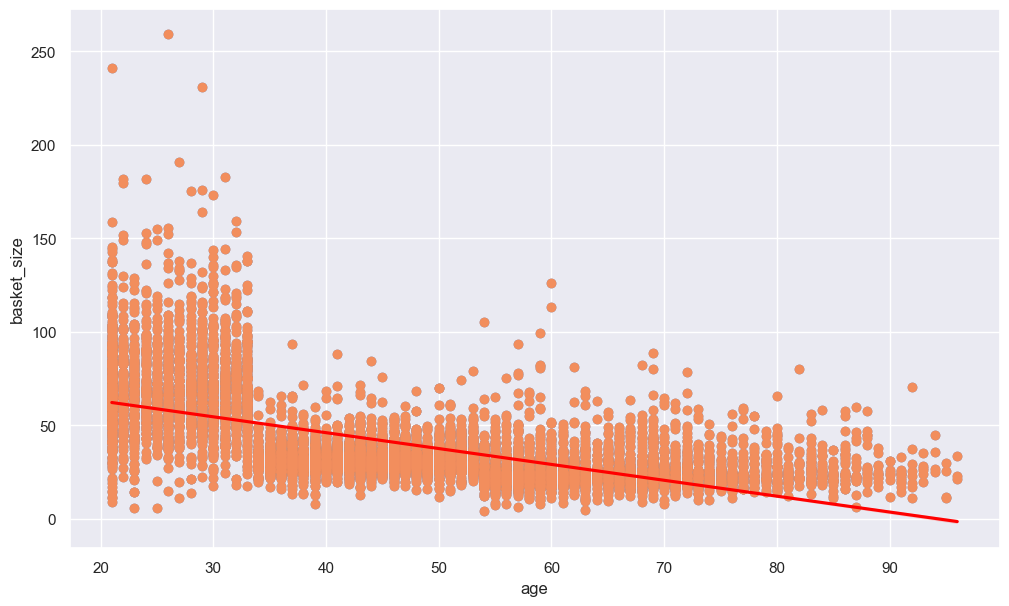

In [74]:
# Le graphique suivant nous montre, part sa droite de regression, une corrélation négative conséquente observée entre l'age et la taille du panier
sns.set_theme(rc={"figure.figsize":(12,7)})
sns.regplot(x='age', y='basket_size', data=df_clients, line_kws={'color': 'red'})
plt.scatter(x=df_clients["age"], y=df_clients["basket_size"], color="#f28e5d")
plt.show()

In [75]:
corr, p_value = scipy.stats.spearmanr(df_clients['age'], df_clients["basket_size"])
print("L'hypothèse nulle est qu'il n'y a pas de relation significative entre les deux variables")
print("L'hypothèse alternative est qu'il y a une relation significative entre les deux variables")

print(f"Coefficient de corrélation de Spearman: {corr}")
print(f"P-value: {p_value}")
# Seuil alpha de 5%
alpha = 0.05
if p < alpha:
    print("Il y a une relation significative entre les variables (accepter l'hypothèse alternative)")
else:
    print("Il n'y a pas de relation significative entre les variables (accepter l'hypothèse nulle)")

L'hypothèse nulle est qu'il n'y a pas de relation significative entre les deux variables
L'hypothèse alternative est qu'il y a une relation significative entre les deux variables
Coefficient de corrélation de Spearman: -0.7011231766315812
P-value: 0.0
Il y a une relation significative entre les variables (accepter l'hypothèse alternative)


<div style="display: flex; background-color: #7a310c;" >
<h1 style="margin: auto; padding: 20px; ">7. Heatmap - Indicateurs clients</h1>
</div>

In [76]:
df_clients.head()
df_clients_v2 = df_clients[["gross_sale", "number_sale", "age", "buying_frequency", "basket_size"]].copy()
corr= df_clients_v2.corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
colormap = sns.diverging_palette(50, 28, as_cmap=True)

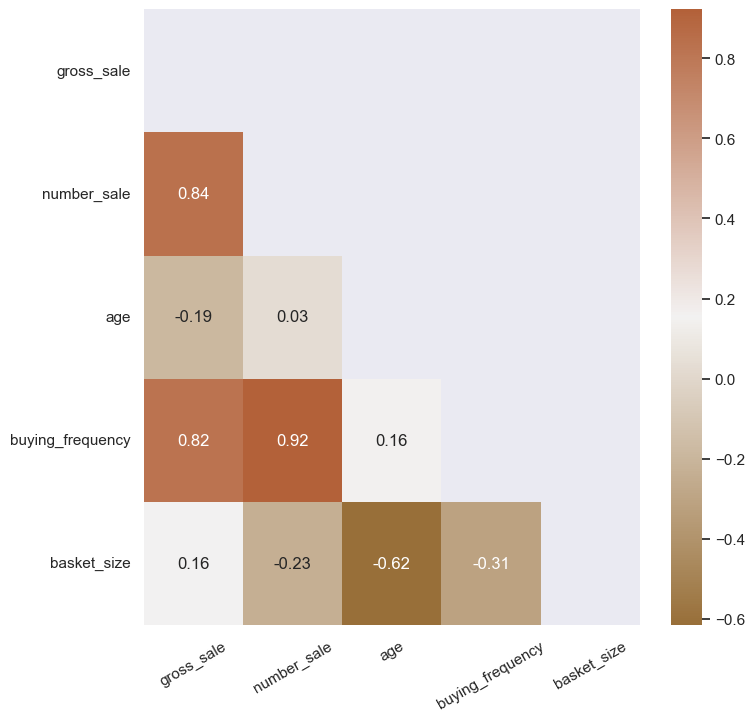

In [77]:
#Création d'un heatmap pour visualiser les corrélations entre les différentes variables liées aux clients
sns.set_theme(rc= {"figure.figsize" : (8,8)})
sns.heatmap(corr, annot=True, mask=mask, cmap=colormap)
plt.yticks(rotation=0)
plt.xticks(rotation=30)
plt.show()